In [4]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import PolyCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable

import xarray as xr
import cmocean.cm as cmo 
import gsw

from scipy.interpolate import griddata
from scipy.spatial import KDTree

# 50 YEAR simlation - time step = 1 year
path ='../../../../automated_testing/integrated_tests/idealised/Thule/Quad/50y/'
pathlad ='../../../../automated_testing/integrated_tests/idealised/Thule/Lad/50y/'

# 300 YEAR simlation - time step = 10 year
path300 ='../../../../automated_testing/integrated_tests/idealised/Thule/Quad/300y/'
pathlad300 ='../../../../automated_testing/integrated_tests/idealised/Thule/Lad/300y/'

In [5]:
path1 ='../../../automated_testing/integrated_tests/idealised/Thule/results_CQNC_250/'
path2 ='../../../automated_testing/integrated_tests/idealised/Thule/results_WQNC_250/'

# Scalar Data

In [6]:
#ScaLad = xr.open_dataset(pathlad + 'scalar_output_ANT_00001.nc')
ScaQuad1 = xr.open_dataset(path1 + 'scalar_output_ANT_00001.nc')
ScaLad = ScaQuad1

ScaLad300 = ScaQuad1
ScaQuad300 = ScaQuad1


#ScaLad300 = xr.open_dataset(pathlad300 + 'scalar_output_ANT_00001.nc')
#ScaQuad300 = xr.open_dataset(path300 + 'scalar_output_ANT_00001.nc')

To select the years if the run is longer than intended
### for 10 years
ScaLad.time[:103] \
ScaQuad.time[:65]

--> ScaQuad =ScaQuad.sel(time=ScaQuad.time[:65])

### for 300 instead of 500 years 
ScaQuad300.time[:1248]

ScaQuad300 =ScaQuad300.sel(time=ScaQuad300.time[:1248])

In [7]:
time10 = np.linspace(0, 10, 11)
time50 = np.linspace(0, 50, 51)
time300 = np.linspace(0, 300, 31)

## Plots of scalar output

NameError: name 'ScaQuad' is not defined

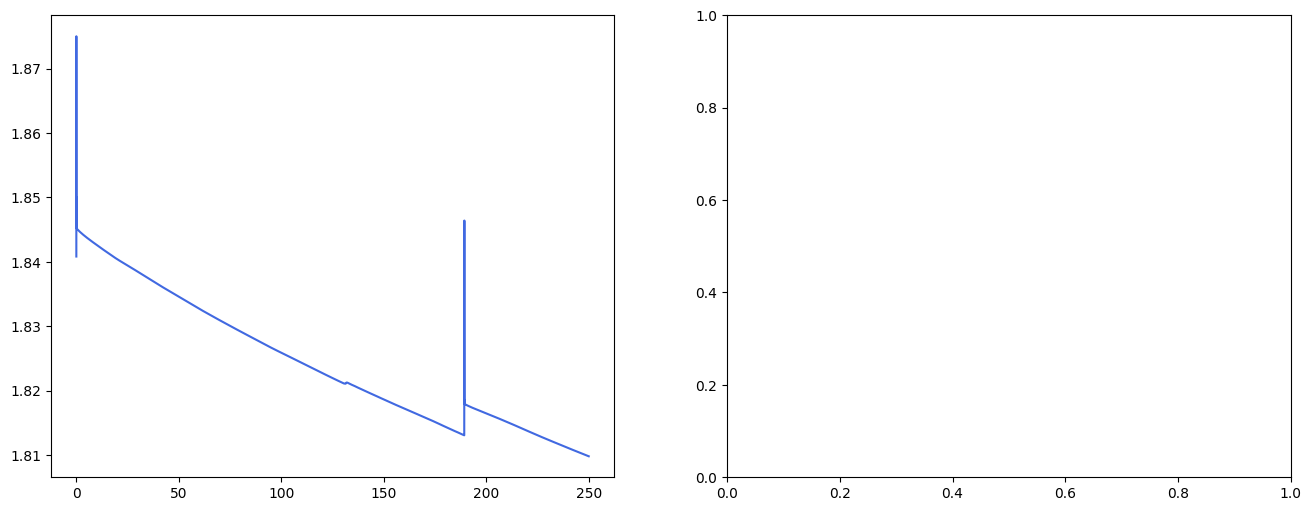

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 50 years
ax1.plot(ScaLad['time'], ScaLad['ice_volume'], label='LADDIE', color='royalblue')
ax1.plot(ScaQuad['time'], ScaQuad['ice_volume'], label='QUAD', color='salmon')
ax1.set_title('Ice Volume - 50 years', fontsize=16)
ax1.set_xlabel('Time [year]', fontsize=14)
ax1.set_ylabel('Ice Volume [m s.l.e]', fontsize=14)
#ax1.axvspan(0, 10, color='grey', alpha=0.3, label='First 10 years')
ax1.legend(loc='upper right')
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
#ax1.set_ylim(0.7,1.8)
ax1.grid(True)

# Plot for 300 years 
ax2.plot(ScaLad300['time'], ScaLad300['ice_volume'], label='LADDIE', color='royalblue')
ax2.plot(ScaQuad300['time'], ScaQuad300['ice_volume'], label='QUAD', color='salmon')
ax2.set_title('Ice Volume - 300 years', fontsize=16)
ax2.set_xlabel('Time [year]', fontsize=14)
ax2.set_ylabel('Ice Volume [m s.l.e]', fontsize=14)
#ax2.axvspan(0, 10, color='grey', alpha=0.3, label='First 10 years')
ax2.axvspan(0, 50, color='grey', alpha=0.2, label='First 50 years')
#ax2.set_ylim(0.7,1.8)
ax2.legend(loc='upper right')
ax2.annotate(
    "mesh update",
    xy=(265, 0.8),  # End of the line (on boundary)
    xytext=(240, 0.9),  # Text position
    ha='center', va='center',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
    arrowprops=dict(arrowstyle='-', color='black', lw=1, linestyle='--', alpha=0.7),
)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

In [9]:
a = (ScaLad300['ice_volume'][-1] - ScaLad300['ice_volume'][0])
b = (ScaLad300['ice_volume'][-1] - ScaLad300['ice_volume'][0])/300
c = (ScaLad['ice_volume'][-1] - ScaLad['ice_volume'][0])
d = (ScaLad['ice_volume'][-1] - ScaLad['ice_volume'][0])/50

e = (ScaQuad300['ice_volume'][-1] - ScaQuad300['ice_volume'][0])
f = (ScaQuad300['ice_volume'][-1] - ScaQuad300['ice_volume'][0])/300
g = (ScaQuad['ice_volume'][-1] - ScaQuad['ice_volume'][0])
h = (ScaQuad['ice_volume'][-1] - ScaQuad['ice_volume'][0])/50

NameError: name 'ScaQuad' is not defined

In [10]:
print("Laddie ice volume loss and rate:")
print(f"over 50 years : {c.values:.3f} m s.l.e and {d.values:.3f} m s.l.e/year")
print(f"over 300 years : {a.values:.3f} m s.l.e and {b.values:.3f} m s.l.e/year")
print("")

print("Quadratic ice volume loss and rate:")
print(f"over 50 years : {g.values:.3f} m s.l.e and {h.values:.3f} m s.l.e/year")
print(f"over 300 years : {e.values:.3f} m s.l.e and {f.values:.3f} m s.l.e/year")



Laddie ice volume loss and rate:
over 50 years : -0.031 m s.l.e and -0.001 m s.l.e/year
over 300 years : -0.031 m s.l.e and -0.000 m s.l.e/year

Quadratic ice volume loss and rate:


NameError: name 'g' is not defined

NameError: name 'ScaQuad' is not defined

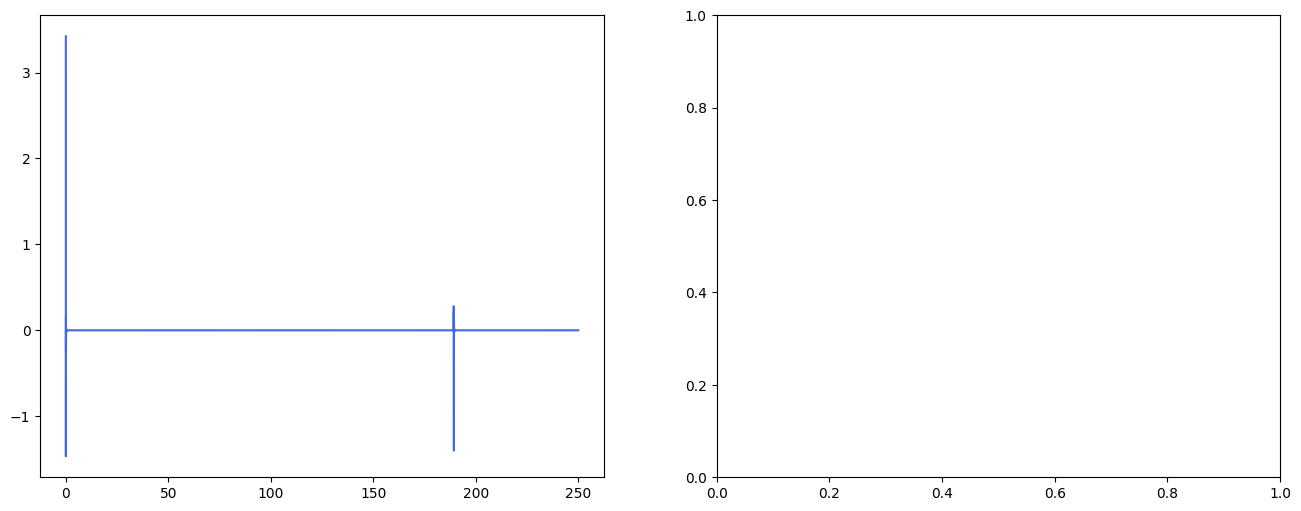

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 50 years
ax1.plot(ScaLad['time'], np.gradient(ScaLad['ice_volume'], ScaLad['time']), label='LADDIE', color='royalblue')
ax1.plot(ScaQuad['time'], np.gradient(ScaQuad['ice_volume'], ScaQuad['time']), label='QUAD', color='salmon')
ax1.set_title('Ice Volume loss per year - 50 years', fontsize=16)
ax1.set_xlabel('Time [year]', fontsize=14)
ax1.set_ylabel('Loss rate [m s.l.e /year]', fontsize=14)
#ax1.axvspan(0, 10, color='grey', alpha=0.3, label='First 10 years')
ax1.legend(loc='lower center')
ax1.set_ylim(-0.06,0)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(True)

# Plot for 300 years 
ax2.plot(ScaLad300['time'],np.gradient(ScaLad300['ice_volume'], ScaLad300['time']), label='LADDIE', color='royalblue')
ax2.plot(ScaQuad300['time'],np.gradient(ScaQuad300['ice_volume'], ScaQuad300['time']),  label='QUAD', color='salmon')
ax2.set_title('Ice Volume loss per year - 300 years', fontsize=16)
ax2.set_xlabel('Time [year]', fontsize=14)
ax2.set_ylabel('Loss rate [m s.l.e / year]', fontsize=14)
#ax2.axvspan(0, 10, color='grey', alpha=0.3, label='First 10 years')
ax2.axvspan(0, 50, color='grey', alpha=0.2, label='First 50 years')
ax2.set_ylim(-0.06,0)
ax2.legend(loc='lower center')
ax2.annotate(
    "mesh update",
    xy=(265, -0.03),  # End of the line (on boundary)
    xytext=(220, -0.03),  # Text position
    ha='center', va='center',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
    arrowprops=dict(arrowstyle='-', color='black', lw=1, linestyle='--', alpha=0.7),
)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

NameError: name 'ScaQuad' is not defined

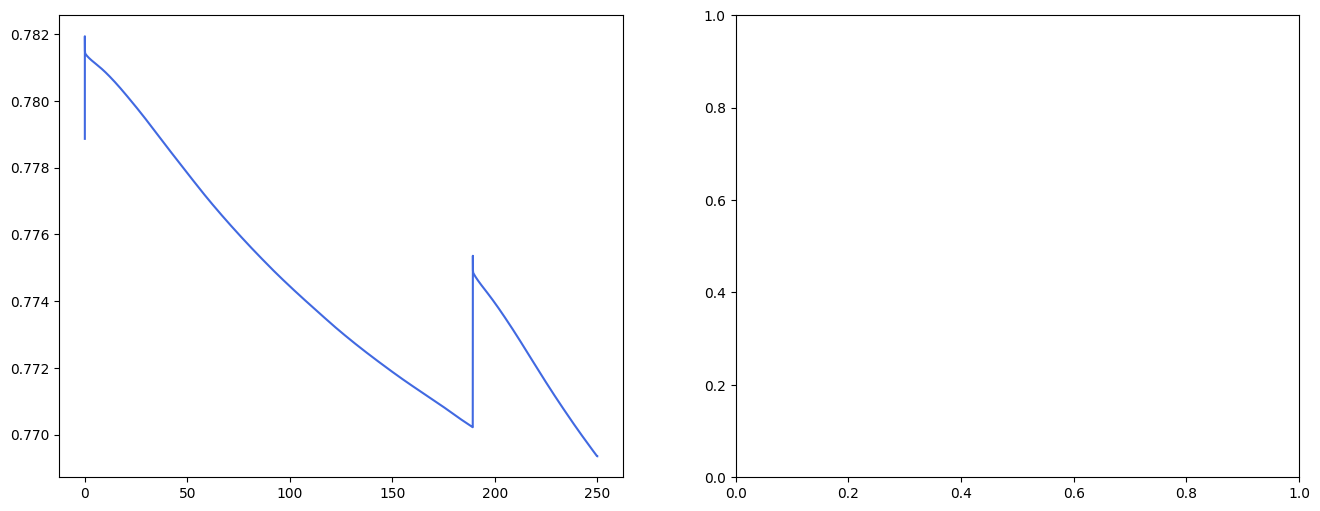

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 50 years
ax1.plot(ScaLad['time'], ScaLad['ice_volume_af'], label='LADDIE', color='royalblue')
ax1.plot(ScaQuad['time'], ScaQuad['ice_volume_af'], label='QUAD', color='salmon')
ax1.set_title('Ice Volume afloat - 50 years', fontsize=16)
ax1.set_xlabel('Time [year]', fontsize=14)
ax1.set_ylabel('Ice Volume [m s.l.e]', fontsize=14)
#ax1.axvspan(0, 10, color='grey', alpha=0.3, label='First 10 years')
ax1.legend(loc='upper right')
#ax1.set_ylim(0.7,1.8)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(True)

# Plot for 300 years 
ax2.plot(ScaLad300['time'], ScaLad300['ice_volume_af'], label='LADDIE', color='royalblue')
ax2.plot(ScaQuad300['time'], ScaQuad300['ice_volume_af'], label='QUAD', color='salmon')
ax2.set_title('Ice Volume afloat - 300 years', fontsize=16)
ax2.set_xlabel('Time [year]', fontsize=14)
ax2.set_ylabel('Ice Volume [m s.l.e]', fontsize=14)
#ax2.axvspan(0, 10, color='grey', alpha=0.3, label='First 10 years')
ax2.axvspan(0, 50, color='grey', alpha=0.2, label='First 50 years')
#ax2.set_ylim(0.7,1.8)
ax2.legend(loc='upper right')
ax2.annotate(
    "mesh update",
    xy=(265, 0.587),  # End of the line (on boundary)
    xytext=(250, 0.61),  # Text position
    ha='center', va='center',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
    arrowprops=dict(arrowstyle='-', color='black', lw=1, linestyle='--', alpha=0.7),
)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

NameError: name 'ScaQuad' is not defined

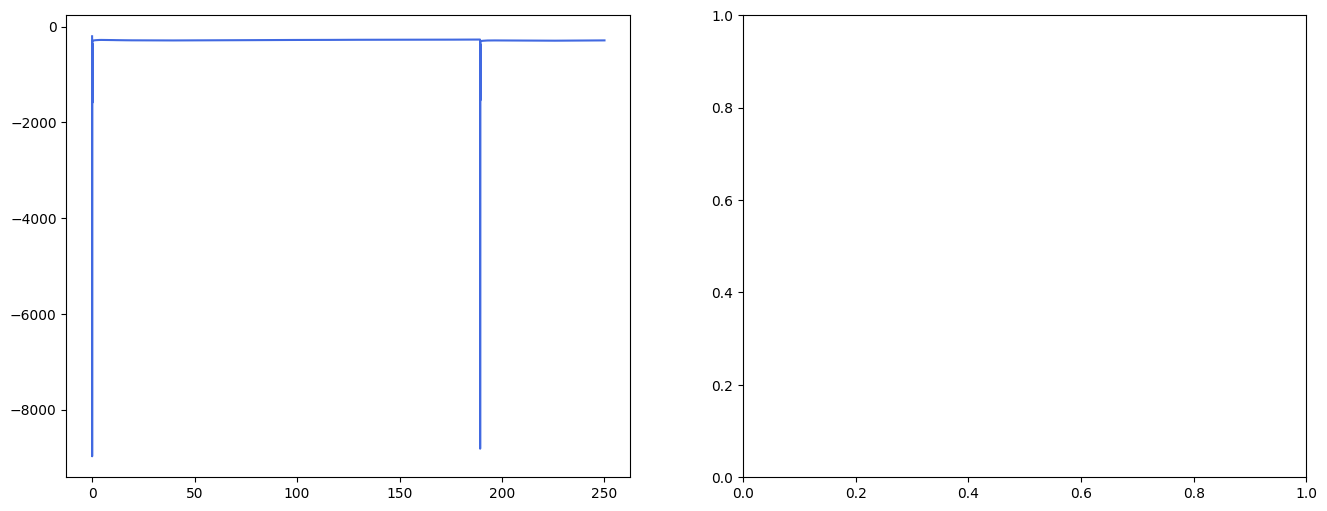

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 50 years
ax1.plot(ScaLad['time'], ScaLad['gl_flux'], label='LADDIE', color='royalblue')
ax1.plot(ScaQuad['time'], ScaQuad['gl_flux'], label='QUAD', color='salmon')
ax1.set_title('Grounding line flux - 50 years', fontsize=16)
ax1.set_xlabel('Time [year]', fontsize=14)
ax1.set_ylabel('Grounding line flux [Gt/year]', fontsize=14)
#ax1.axvspan(0, 10, color='grey', alpha=0.3, label='First 10 years')
ax1.legend(loc='lower left')
ax1.set_ylim(-700,-200)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(True)

# Plot for 300 years 
ax2.plot(ScaLad300['time'], ScaLad300['gl_flux'], label='LADDIE', color='royalblue')
ax2.plot(ScaQuad300['time'], ScaQuad300['gl_flux'], label='QUAD', color='salmon')
ax2.set_title('Grounding line flux - 300 years', fontsize=16)
ax2.set_xlabel('Time [year]', fontsize=14)
ax2.set_ylabel('Grounding line flux [Gt/year]', fontsize=14)
#ax2.axvspan(0, 10, color='grey', alpha=0.3, label='First 10 years')
ax2.axvspan(0, 50, color='grey', alpha=0.2, label='First 50 years')
ax2.set_ylim(-700,-200)
ax2.legend(loc='lower center')
ax2.annotate(
    "mesh update",
    xy=(265, -550),  # End of the line (on boundary)
    xytext=(220, -550),  # Text position
    ha='center', va='center',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
    arrowprops=dict(arrowstyle='-', color='black', lw=1, linestyle='--', alpha=0.7),
)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'ScaQuad' is not defined

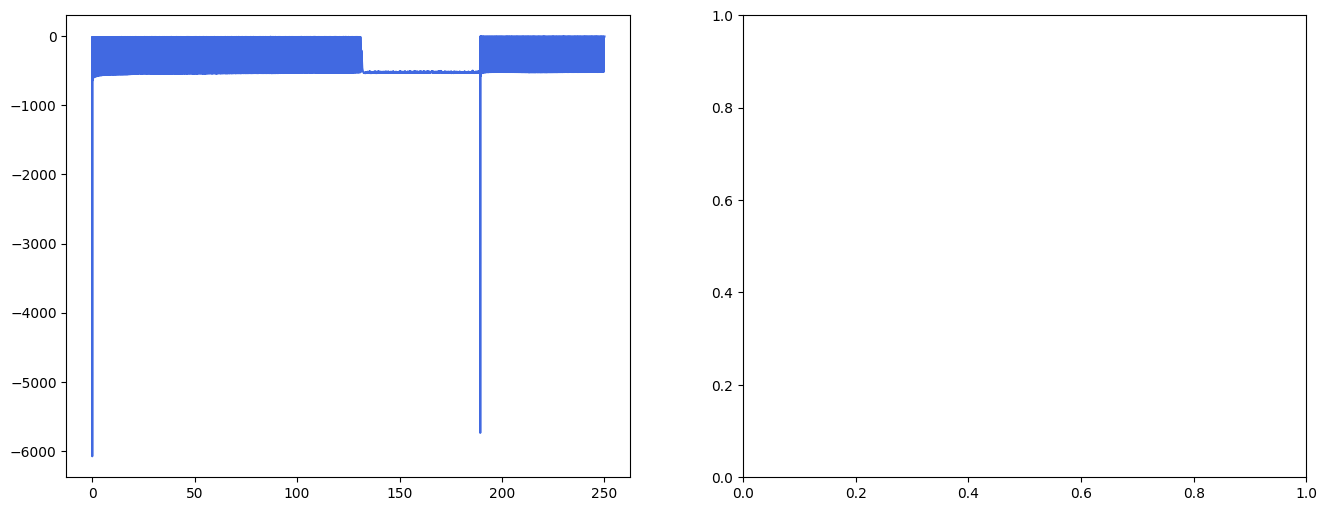

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

name = 'cf_fl_flux'
# Plot for 50 years
ax1.plot(ScaLad['time'], ScaLad['cf_fl_flux'], label='LADDIE', color='royalblue')
ax1.plot(ScaQuad['time'], ScaQuad['cf_fl_flux'], label='QUAD', color='salmon')
ax1.set_title('Calving front flux - 50 years', fontsize=16)
ax1.set_xlabel('Time [year]', fontsize=14)
ax1.set_ylabel('Calving front flux [Gt/year]', fontsize=14)
#ax1.axvspan(0, 10, color='grey', alpha=0.3, label='First 10 years')
ax1.legend(loc='lower right')
ax1.set_ylim(-500,0)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(True)

# Plot for 300 years 
ax2.plot(ScaLad300['time'], ScaLad300['cf_fl_flux'], label='LADDIE', color='royalblue')
ax2.plot(ScaQuad300['time'], ScaQuad300['cf_fl_flux'], label='QUAD', color='salmon')
ax2.set_title('Calving front flux - 300 years', fontsize=16)
ax2.set_xlabel('Time [year]', fontsize=14)
ax2.set_ylabel('Calving front flux [Gt/year]', fontsize=14)
#ax2.axvspan(0, 10, color='grey', alpha=0.3, label='First 10 years')
ax2.axvspan(0, 50, color='grey', alpha=0.2, label='First 50 years')
ax2.set_ylim(-500,0)
ax2.legend(loc='lower center')
ax2.annotate(
    "mesh update",
    xy=(265, -300),  # End of the line (on boundary)
    xytext=(220, -300),  # Text position
    ha='center', va='center',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
    arrowprops=dict(arrowstyle='-', color='black', lw=1, linestyle='--', alpha=0.7),
)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'ScaQuad' is not defined

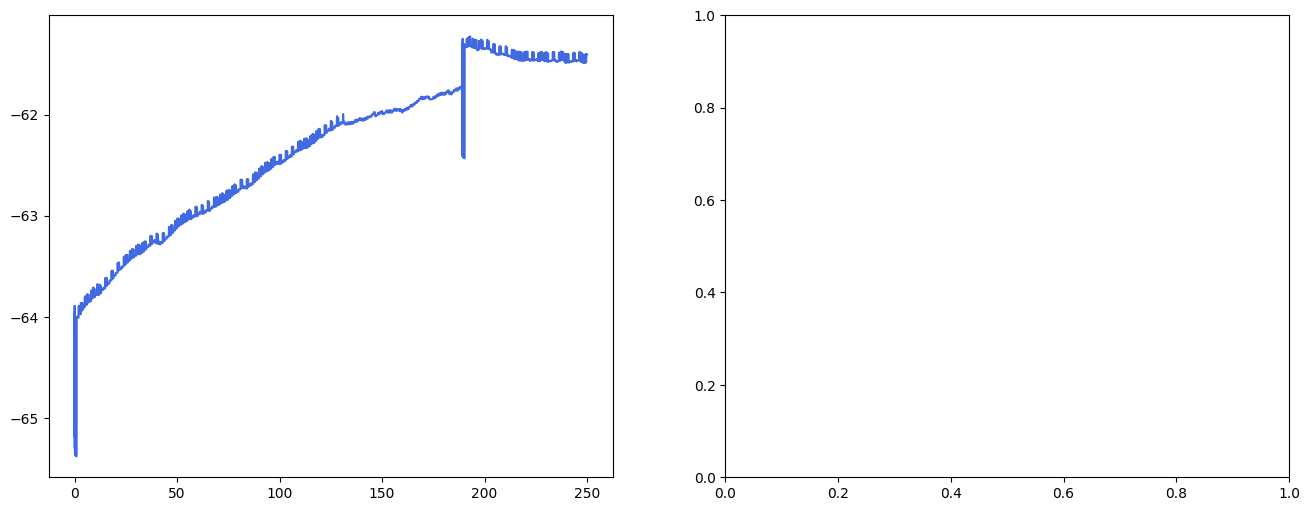

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 50 years
ax1.plot(ScaLad['time'], ScaLad['BMB_fl'], label='LADDIE', color='royalblue')
ax1.plot(ScaQuad['time'], ScaQuad['BMB_fl'], label='QUAD', color='salmon')
ax1.set_title(' Ice shelf basal melt  - 50 years', fontsize=16)
ax1.set_xlabel('Time [year]', fontsize=14)
ax1.set_ylabel('BMB [Gt /year]', fontsize=14)
#ax1.axvspan(0, 10, color='grey', alpha=0.3, label='First 10 years')
ax1.legend(loc='lower center')
#ax1.set_ylim(-17500,0)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(True)

# Plot for 300 years 
ax2.plot(ScaLad300['time'], ScaLad300['BMB_fl'], label='LADDIE', color='royalblue')
ax2.plot(ScaQuad300['time'], ScaQuad300['BMB_fl'], label='QUAD', color='salmon')
ax2.set_title('ice shelf basal melt - 300 years', fontsize=16)
ax2.set_xlabel('Time [year]', fontsize=14)
ax2.set_ylabel('BMB [Gt /year]', fontsize=14)
#ax2.axvspan(0, 10, color='grey', alpha=0.3, label='First 10 years')
ax2.axvspan(0, 50, color='grey', alpha=0.2, label='First 50 years')
#ax2.set_ylim(-17500,0)
ax2.legend(loc='lower center')
ax2.annotate(
    "mesh update",
    xy=(265, -1000),  # End of the line (on boundary)
    xytext=(220, -2500),  # Text position
    ha='center', va='center',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
    arrowprops=dict(arrowstyle='-', color='black', lw=1, linestyle='--', alpha=0.7),
)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

# Main output data

In [16]:
MainLad = xr.open_dataset(path+ 'main_output_ANT_00001.nc')
MainQuad = xr.open_dataset(path + 'main_output_ANT_00001.nc')
#MainLad = xr.open_dataset(pathlad+ 'main_output_ANT_00001.nc')

#MainLad300 = xr.open_dataset(pathlad300 + 'main_output_ANT_00001.nc')
#MainQuad300 = xr.open_dataset(path300 + 'main_output_ANT_00001.nc')

NameError: name 'path' is not defined

In [17]:
# Seperat into variables
Va1 = MainLad['V']
V = Va1.T

Tria1 = MainLad['Tri'] - 1  
Tri = Tria1.T

triang = tri.Triangulation(V[:, 0], V[:, 1], Tri)


Hi_l = MainLad['Hi']
#Hib_l = MainLad['Hib']
Hs_l = MainLad['Hs']
Hb_l = MainLad['Hb']


# Seperat into variables
Va2 = MainQuad['V']
V2 = Va2.T

Tria2 = MainQuad['Tri'] - 1  
Tri2 = Tria2.T

triang2 = tri.Triangulation(V2[:, 0], V2[:, 1], Tri2)

Hi_q = MainQuad['Hi']
#Hib_q = MainQuad['Hib']
Hs_q = MainQuad['Hs']
Hb_q = MainQuad['Hb']

NameError: name 'MainLad' is not defined

In [18]:
#time = np.linspace(0, 300, 301)
#time50 = np.linspace(0, 300, 301)
time = 0
time50 = 0

p = 0.01
cmap = plt.cm.viridis
#Quad = [cmap(i) for i in np.linspace(0, 1, len(time))]
#Lad = [cmap(i) for i in np.linspace(0, 1, len(time50))]


radius = 750000
distances1 = np.sqrt(V[:, 0]**2 + V[:, 1]**2)
mask_ocean = distances1 <= radius


fig, (ax2 , ax1) = plt.subplots(1,2,figsize=(24, 6))
fig.suptitle('Cumulative Density of Ice Shelf Thickness', fontsize=20)

#for u in range(len(time50)):
for u in range(1):
    #P = int(time50[u])
    P = 0
    mask_rock = (Hs_l[u] - Hi_l[u] - Hb_l[u] >= p)
    Hi = Hi_l[u].where(mask_rock & mask_ocean)
    His = Hi.sortby(Hi)
    cumulative_density = His.cumsum() / His.sum()
    if P % 5 == 0:  # Add label every 5 years
        #ax1.plot(His, cumulative_density, color=Lad[u], linewidth=0.5, label=f"{P} years")
        ax1.plot(His, cumulative_density, color='blue', linewidth=0.5, label=f"{P} years")
    #else:
    #    ax1.plot(His, cumulative_density, color=Lad[u], linewidth=0.5)

"""for u in range(len(time)):
    P = int(time[u])
    Hii = Hi_q[u].where(mask_rock & mask_ocean)
    Hiis = Hii.sortby(Hii)
    cumulative = Hiis.cumsum() / Hiis.sum()
    if P % 5 == 0:  # Add label every 5 years
        ax2.plot(Hiis, cumulative, color=Quad[u], linewidth=0.5, label=f"{P} years")
    #else:
     #   ax2.plot(Hiis, cumulative, color=Quad[u], linewidth=0.5)
"""

ax1.set_xlabel('Ice Thickness [m]', fontsize = 16)
ax1.set_ylabel('Cumulative Density', fontsize = 16)
ax1.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax1.legend(facecolor='white', framealpha=1, loc='lower right')
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_title('LADDIE', fontsize = 18)
ax1.grid()

ax2.set_xlabel('Ice Thickness [m]', fontsize = 16)
ax2.set_ylabel('Cumulative Density', fontsize = 16)
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax2.legend(facecolor='white', framealpha=1, loc='lower right')
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.set_title('QUAD', fontsize = 18)
ax2.grid()
plt.show()

NameError: name 'V' is not defined

NameError: name 'Hi_l' is not defined

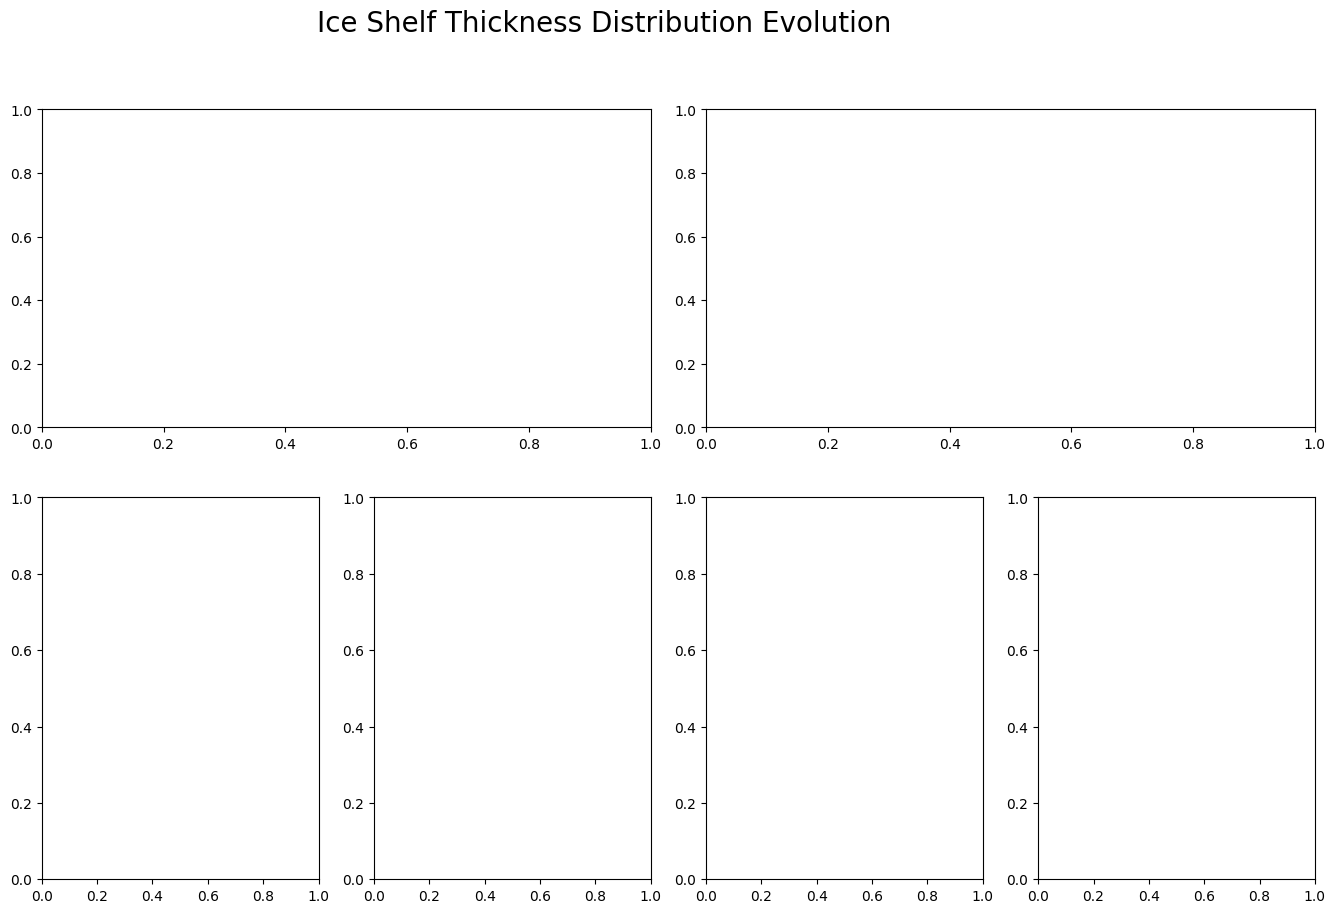

In [19]:
lim = [100, 200, 300 , 400, 500, ]

cmap = cmo.haline

LAD = [cmap(i) for i in np.linspace(0, 1, len(lim))]

first = np.zeros(len(lim))
firstquad = np.zeros(len(lim))
last = np.zeros(len(lim))
lastquad = np.zeros(len(lim))

fig = plt.figure(figsize=(25, 10))  
gs = fig.add_gridspec(2, 6, height_ratios=[1, 1.2])  

ax0 = fig.add_subplot(gs[0, :2])  # Top-left (Favier 1)
ax1 = fig.add_subplot(gs[0, 2:4])  # Top-right (Favier 2)
ax2 = fig.add_subplot(gs[1, 0])    # Bottom 1
ax3 = fig.add_subplot(gs[1, 1])    # Bottom 2 
ax4 = fig.add_subplot(gs[1, 2])    # Bottom 3
ax5 = fig.add_subplot(gs[1, 3]) 

fig.suptitle('Ice Shelf Thickness Distribution Evolution', fontsize=20, x = 0.35 , y=0.98)

for i in range(len(lim)):
    limi = lim[i]
    perc_lad = []
    perc_quad = []
    
    for u in range(len(Hi_l.time)):
        mask_rock= (Hs_l[u] - Hi_l[u] - Hb_l[u] >= p)
        # LADDIE data processing
        Hhhh = Hi_l[u].where(mask_rock & mask_ocean)
        perc = Hhhh.where((Hhhh > limi-100) & (Hhhh < limi))
        tot = Hhhh.count().item()
        part = perc.count().item()
        perc_lad.append(part / tot)

        # Favier data processing
        Uuuu = Hi_q[u].where(mask_rock & mask_ocean)
        crep = Uuuu.where((Uuuu > limi-100) & (Uuuu < limi))
        total = Uuuu.count().item()
        partial = crep.count().item()
        perc_quad.append(partial / total)
  
    fram = np.array(perc_lad)
    boose = np.array(perc_quad)
    first[i] = fram[0]
    #last[i] = fram[10]
    last[i] = fram[0]
    firstquad[i] = boose[0]
    #lastquad[i] = boose[10]
    lastquad[i] = boose[0]
    
    # Scatter plots
    ax0.scatter(time, boose*100, marker='.', s=40, color=LAD[i], 
                   linewidth=2)
    ax0.plot(time, boose*100, color=LAD[i], linewidth=1, alpha=0.7)
    ax1.scatter(time, fram*100, marker='.', s=40, color=LAD[i], 
                   linewidth=2, label=f"{limi-100}-{limi}m")
    ax1.plot(time, fram*100, color=LAD[i], linewidth=1, alpha=0.7)
    ax1.legend(fontsize=14)

#Pie plots
ax2.pie(firstquad, labels=[f"{lim[j]-100}-{lim[j]}m" for j in range(len(firstquad))], autopct="%1.1f%%", colors=LAD[:len(firstquad)])
ax3.pie(lastquad, labels=[f"{lim[j]-100}-{lim[j]}m" for j in range(len(firstquad))], autopct="%1.1f%%", colors=LAD[:len(lastquad)])
ax4.pie(first, labels=[f"{lim[j]-100}-{lim[j]}m" for j in range(len(firstquad))], autopct="%1.1f%%", colors=LAD[:len(first)])
ax5.pie(last, labels=[f"{lim[j]-100}-{lim[j]}m" for j in range(len(firstquad))], autopct="%1.1f%%", colors=LAD[:len(last)])

# Configure top subplots
for ax, title in zip([ax0, ax1], ["Favier et al. 2019", "LADDIE"]):
    ax.set_title(title, fontsize=18, pad=10)  # Increased font size and padding
    ax.set_ylim(0, 65)
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')  # Moved legend outside
    ax.set_xlabel('Time [years]', fontsize=16)
    ax.set_ylabel('Percentage [%]', fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

# Configure pie charts
for ax, title in zip([ax2, ax3, ax4, ax5],
                    ['Favier Year 0', 'Favier Year 10', 'LADDIE Year 0', 'LADDIE Year 10']):
    ax.set_title(title, fontsize=18, pad=10)
    ax.title.set_position([0.5, 0.9]) 


plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.4)  
plt.show()